In [18]:
#import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loding Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [19]:
df= df[df['job_title_short'] == 'Data Analyst']

In [25]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(10)

<Axes: xlabel='skill_count', ylabel='median_salary'>

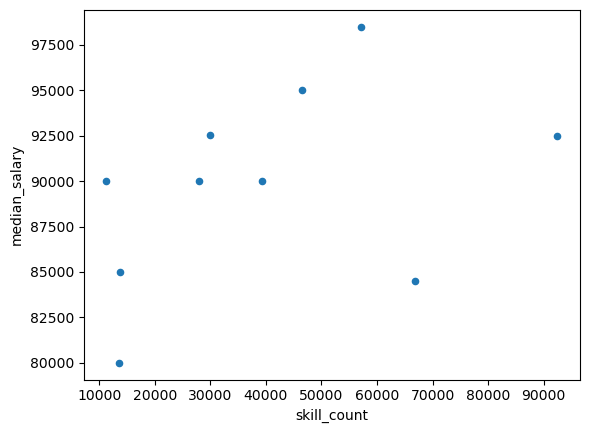

In [26]:
skill_stats.plot(kind= 'scatter', x='skill_count',y='median_salary')